In [1]:
! pip3 install torch torchvision torchaudio
! pip3 install numpy
! pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from MS_SSIM_L1_loss import MS_SSIM_L1_LOSS

In [3]:
def pil2tensor(im):  # in: [PIL Image with 3 channels]. out: [B=1, C=3, H, W] (0, 1)
    return torch.Tensor((np.float32(im) / 255).transpose(2, 0 ,1)).unsqueeze(0)

In [4]:
def display(img, gt,type):
  # Display ground truth image and blurred image side by side
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))

  # Display ground truth image
  gt_img = gt.squeeze().permute(1, 2, 0).cpu().numpy()
  ax[0].imshow(gt_img)
  ax[0].set_title('Ground truth')

  # Display blurred image
  blurred_img = img.squeeze().permute(1, 2, 0).cpu().numpy()
  ax[1].imshow(blurred_img)
  ax[1].set_title(f'{str(type)} image')

  plt.show()

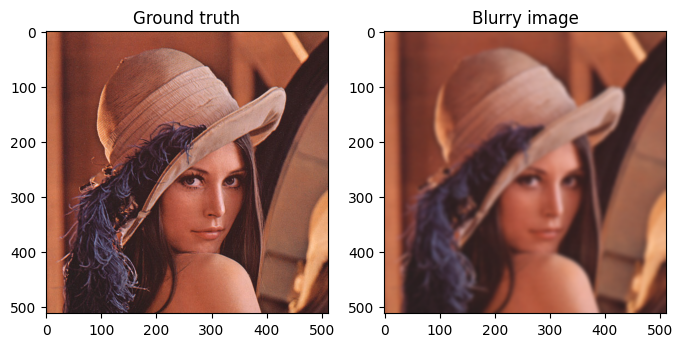

MS_SSIM_L1_LOSS for image:10.212343215942383


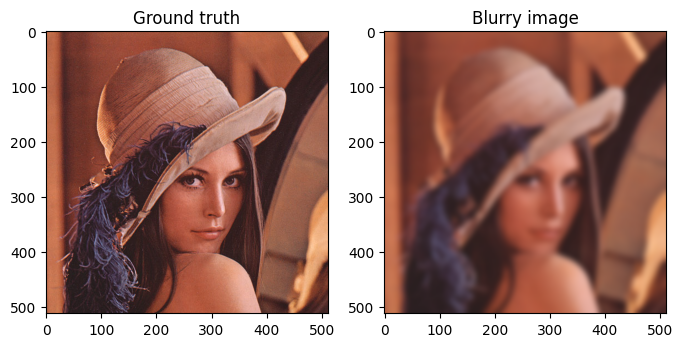

MS_SSIM_L1_LOSS for image:11.89562702178955


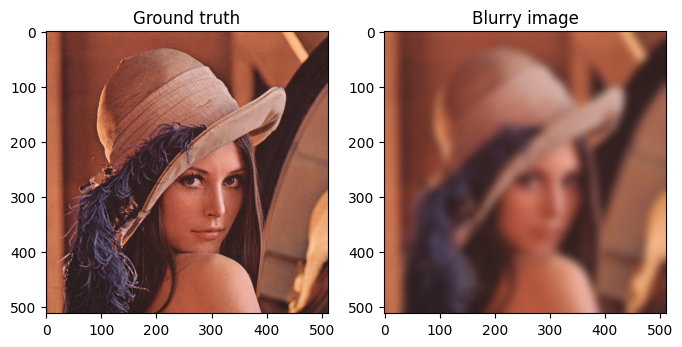

MS_SSIM_L1_LOSS for image:13.253458023071289


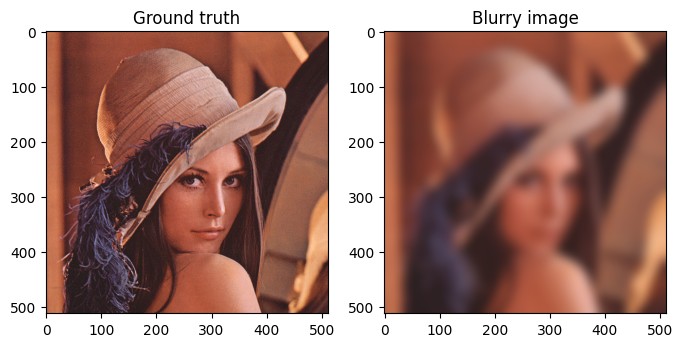

MS_SSIM_L1_LOSS for image:14.455934524536133


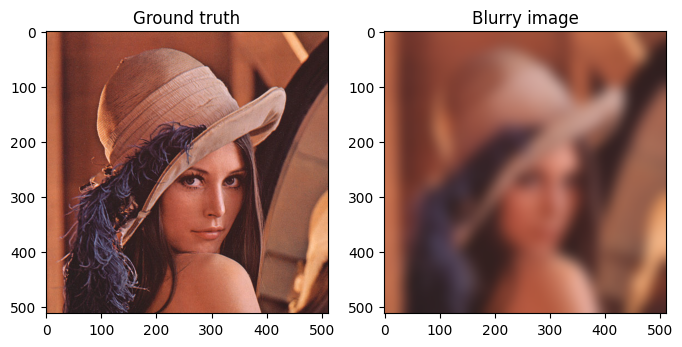

MS_SSIM_L1_LOSS for image:15.543140411376953


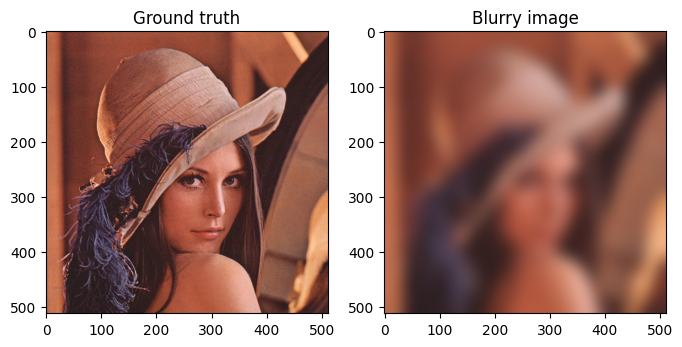

MS_SSIM_L1_LOSS for image:16.536548614501953


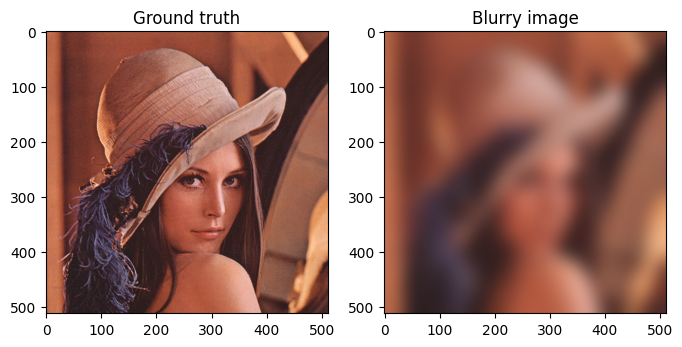

MS_SSIM_L1_LOSS for image:17.446741104125977


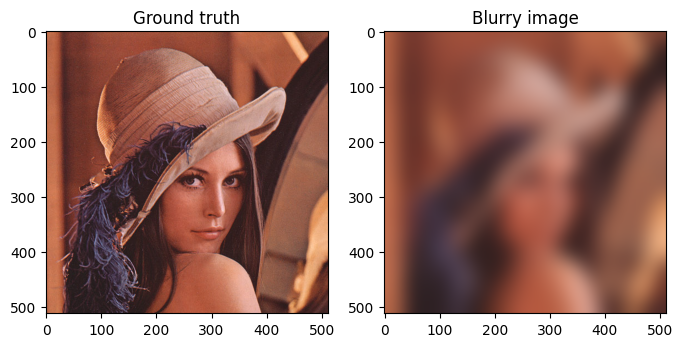

MS_SSIM_L1_LOSS for image:18.28428077697754


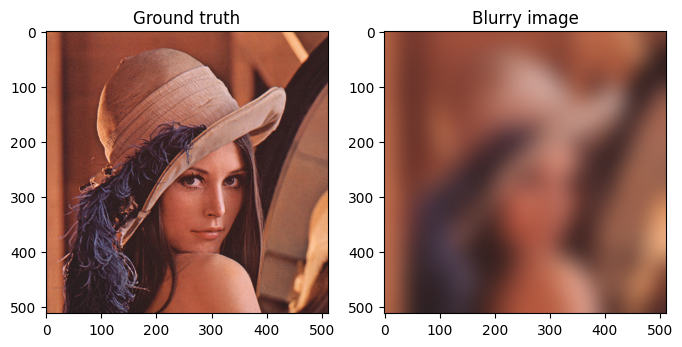

MS_SSIM_L1_LOSS for image:19.062509536743164


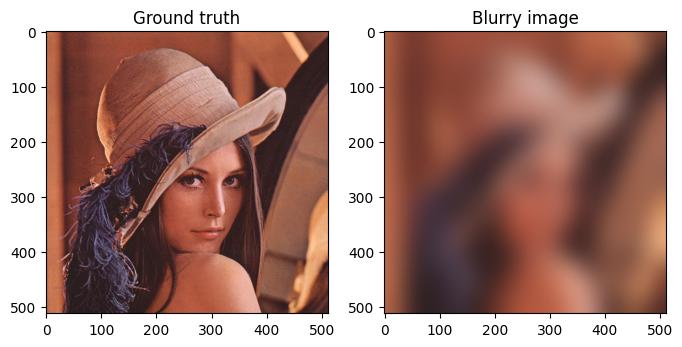

MS_SSIM_L1_LOSS for image:19.790790557861328


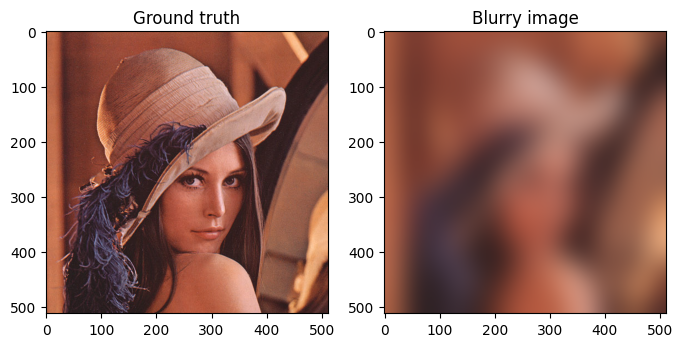

MS_SSIM_L1_LOSS for image:20.47257423400879


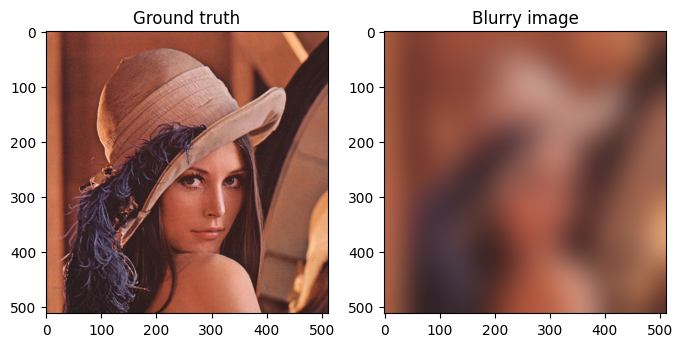

MS_SSIM_L1_LOSS for image:21.110872268676758


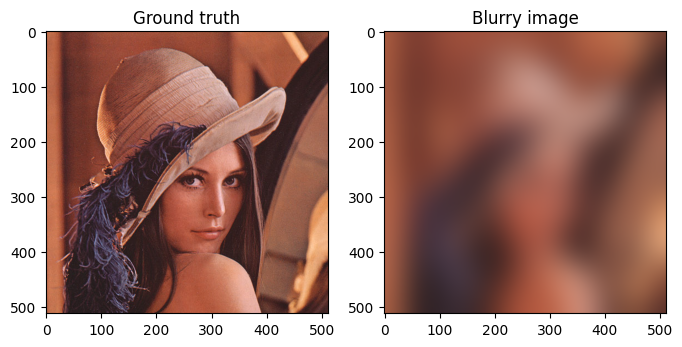

MS_SSIM_L1_LOSS for image:21.708080291748047


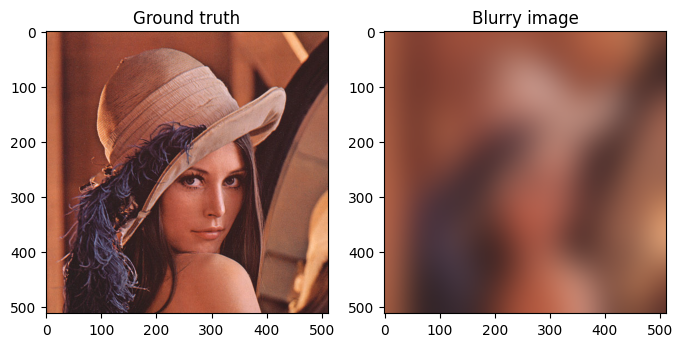

MS_SSIM_L1_LOSS for image:22.264331817626953


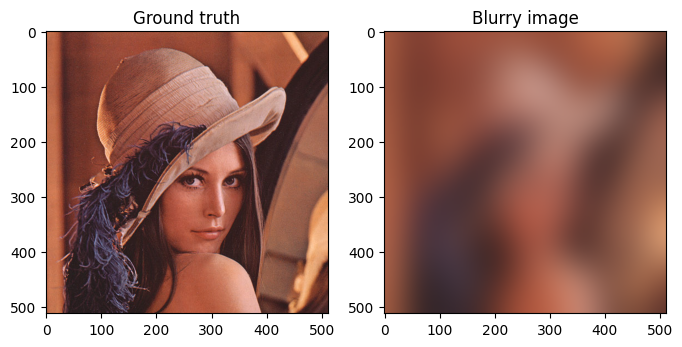

MS_SSIM_L1_LOSS for image:22.784820556640625


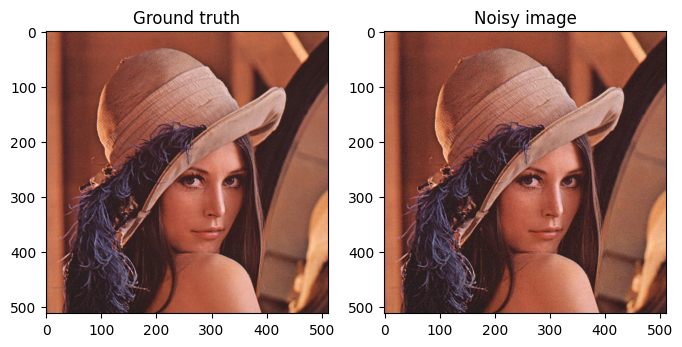

MS_SSIM_L1_LOSS for image:6.740887641906738
tensor(6.7409, device='cuda:0')


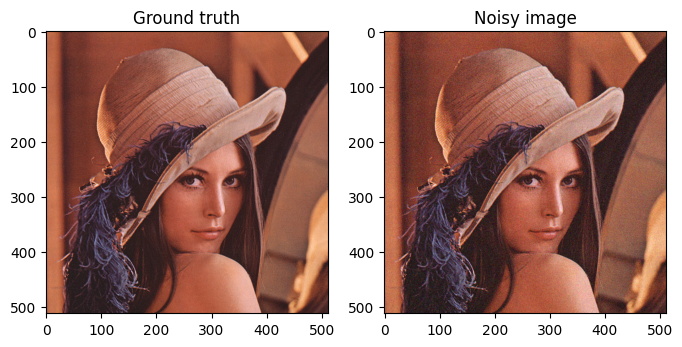

MS_SSIM_L1_LOSS for image:10.649284362792969
tensor(10.6493, device='cuda:0')


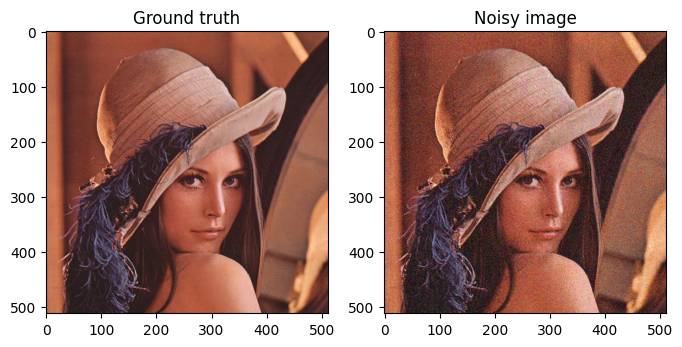

MS_SSIM_L1_LOSS for image:16.788312911987305
tensor(16.7883, device='cuda:0')


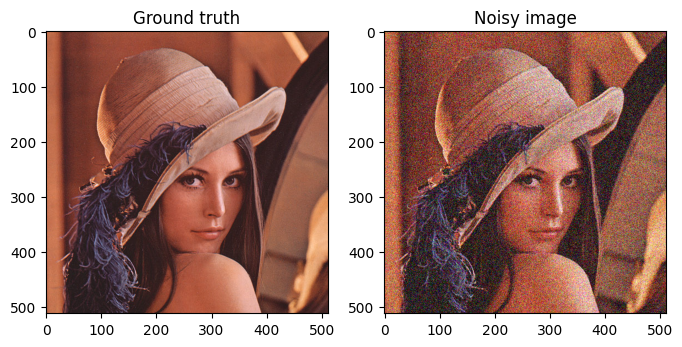

MS_SSIM_L1_LOSS for image:27.69866943359375
tensor(27.6987, device='cuda:0')


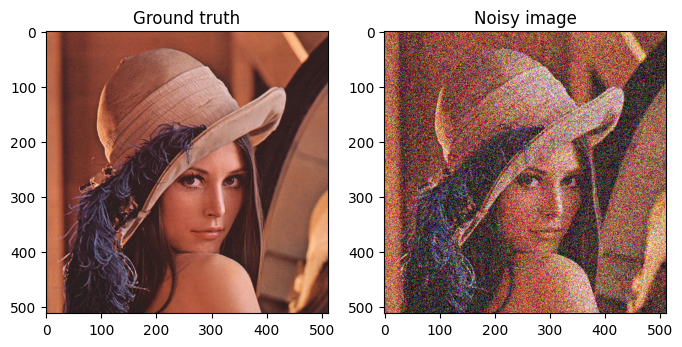

MS_SSIM_L1_LOSS for image:44.200233459472656
tensor(44.2002, device='cuda:0')


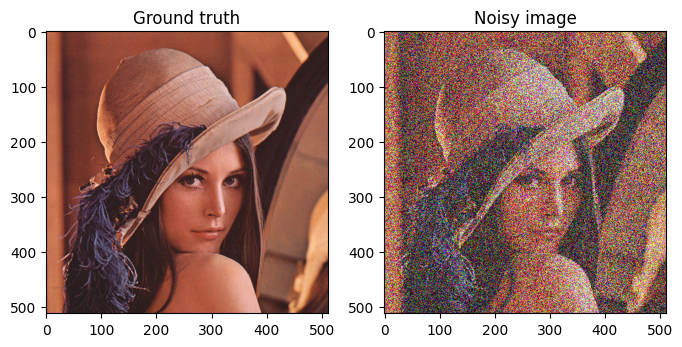

MS_SSIM_L1_LOSS for image:59.51985549926758
tensor(59.5199, device='cuda:0')


In [5]:
if __name__ == '__main__':
    '''Test of this loss function'''
    # load image

    im = Image.open('lena.png')
    gt = pil2tensor(im).cuda(0)
    blur_levels = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
    noise_levels = [5, 10 ,20, 40, 80, 160]
    im1 = np.float32(im)
    imgs = []
    imgs2 = []

    for bl in blur_levels:
        imgs.append(im.filter(ImageFilter.GaussianBlur(radius = bl)))
    for nl in noise_levels:
        nr = np.float32(Image.effect_noise((512, 512), nl)) - 128
        ng = np.float32(Image.effect_noise((512, 512), nl)) - 128
        nb = np.float32(Image.effect_noise((512, 512), nl)) - 128
        noise = np.stack((nr, ng, nb), 2)
        imn = Image.fromarray(np.uint8(np.clip(im1 + noise, 0, 255)))
        imgs2.append(imn)

    # test the loss
    LOSS = MS_SSIM_L1_LOSS()
    loss_blur = []
    loss_noise = []
    for img in imgs:
        img = pil2tensor(img).cuda(0)
        loss = LOSS(img, gt)
        display(img, gt, 'Blurry')
        print(f'MS_SSIM_L1_LOSS for image:{loss}')
        loss_blur.append(loss)
    for img in imgs2:
        img = pil2tensor(img).cuda(0)
        loss = LOSS(img, gt)
        display(img, gt, 'Noisy')
        print(f'MS_SSIM_L1_LOSS for image:{loss}')
        loss_noise.append(loss)
        print(loss)